1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
-- 1 building_windows_float_processed

-- 2 building_windows_non_float_processed

-- 3 vehicle_windows_float_processed

-- 4 vehicle_windows_non_float_processed (none in this database)

-- 5 containers

-- 6 tableware

-- 7 headlamps


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train=pd.read_csv("/content/trainKNN (1).txt")


In [ ]:
df_train.columns = ['ID', 'Ref_In', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']
df_train.head(5)

,ID,Ref_In,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [ ]:
df_test=pd.read_csv("/content/testKNN (1).txt")
df_test.columns = ['ID', 'Ref_In', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']
df_test.head()

,ID,Ref_In,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35,2


ID is an unique items so we can delete ID from train and test data

In [ ]:
df_train=df_train.drop('ID',axis=1)
df_test=df_test.drop(columns=['ID'])

In [ ]:
df_train.isnull().sum()

Ref_In           0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [ ]:
df_test.isnull().sum()


Ref_In           0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [ ]:
df_train.describe()

,Ref_In,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,1.518281,13.373846,2.750103,1.456154,72.639795,0.521744,8.911538,0.165077,0.050513,2.676923
std,0.003057,0.784929,1.390655,0.492293,0.763064,0.673624,1.425102,0.486304,0.086506,2.064234
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516455,12.875000,2.335000,1.190000,72.330000,0.145000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.270000,3.480000,1.360000,72.810000,0.560000,8.570000,0.000000,0.000000,2.000000
75%,1.518950,13.795000,3.605000,1.625000,73.080000,0.610000,9.105000,0.000000,0.090000,3.000000
max,1.533930,15.790000,3.980000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [ ]:
df_test.describe()

,Ref_In,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,17.000000,17.000000,17.000000,17.00000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1.518991,13.805294,1.769412,1.37000,72.849412,0.257647,9.437647,0.310000,0.128235,4.176471
std,0.002810,1.101659,1.744772,0.58676,0.910415,0.272799,1.419386,0.631951,0.169567,2.157409
min,1.511150,12.850000,0.000000,0.34000,71.360000,0.000000,6.650000,0.000000,0.000000,1.000000
25%,1.517110,13.000000,0.000000,0.90000,72.200000,0.000000,8.620000,0.000000,0.000000,2.000000
50%,1.519340,13.380000,1.610000,1.40000,72.720000,0.160000,8.990000,0.000000,0.000000,5.000000
75%,1.520650,14.230000,3.540000,1.94000,73.390000,0.560000,10.170000,0.150000,0.240000,6.000000
max,1.523000,17.380000,3.780000,2.17000,75.410000,0.760000,12.500000,1.670000,0.510000,7.000000


In [ ]:
df_train.Type_of_glass.value_counts()

2    73
1    66
7    26
3    14
5    10
6     6
Name: Type_of_glass, dtype: int64

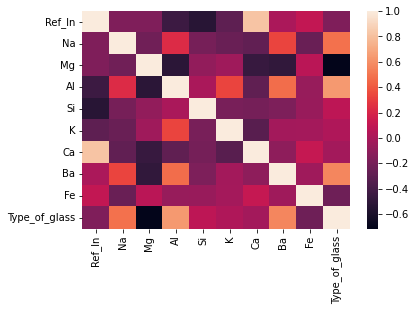

In [ ]:
cor=df_train.corr()
sns.heatmap(cor)

ca and k doesn't affect the type of glass
 
so we can drop ca and k

In [ ]:
#sns.pairplot(df_train,hue='Type_of_glass')
plt.show()

In [ ]:
def standardize (df):
    for col in df.columns:
        if col != "Type_of_glass":
            df[col] = (df[col] - df[col].mean())/df[col].std()
    return df

In [ ]:
train = standardize(df_train)
test = standardize(df_test)
train.head()

,Ref_In,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,-0.219548,0.65758,0.611149,-0.195318,0.118214,-0.061969,-0.758920,-0.339452,-0.583925,1
1,-0.687312,0.19894,0.575195,0.170317,0.458946,-0.195574,-0.794005,-0.339452,-0.583925,1
2,-0.203193,-0.20874,0.675867,-0.337510,-0.039046,0.071637,-0.485255,-0.339452,-0.583925,1
3,-0.281699,-0.13230,0.625531,-0.439075,0.576892,0.041947,-0.590511,-0.339452,-0.583925,1
4,-0.759276,-0.74382,0.618340,0.332822,0.432736,0.175553,-0.590511,-0.339452,2.421657,1


In [ ]:
train=train.drop(columns=['Ca','K'])
test=test.drop(columns=['Ca','K'])

In [ ]:
train.head()

,Ref_In,Na,Mg,Al,Si,Ba,Fe,Type_of_glass
0,-0.219548,0.65758,0.611149,-0.195318,0.118214,-0.339452,-0.583925,1
1,-0.687312,0.19894,0.575195,0.170317,0.458946,-0.339452,-0.583925,1
2,-0.203193,-0.20874,0.675867,-0.337510,-0.039046,-0.339452,-0.583925,1
3,-0.281699,-0.13230,0.625531,-0.439075,0.576892,-0.339452,-0.583925,1
4,-0.759276,-0.74382,0.618340,0.332822,0.432736,-0.339452,2.421657,1


In [ ]:
x_train=train.iloc[:,0:7]
y_train=train['Type_of_glass']
x_test=test.iloc[:,0:7]
y_test=test['Type_of_glass']


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from scipy.spatial import distance
euclid_model = KNeighborsClassifier(n_neighbors=8, metric=distance.sqeuclidean) 
manhattan_model = KNeighborsClassifier(n_neighbors=8, metric=distance.cityblock) 
euclid_model.fit(x_train,y_train) 
manhattan_model.fit(x_train, y_train)


KNeighborsClassifier(metric=<function cityblock at 0x7f818f28bef0>,
                     n_neighbors=8)

In [ ]:
manhattan_predictions = manhattan_model.predict(x_test)
euclid_predictions = euclid_model.predict(x_test) 
df = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,1,1,1
1,1,1,1
2,2,2,2
3,2,1,1
4,2,1,1


In [ ]:
from sklearn.metrics import classification_report
manhattan_count = len(df.loc[df['manhattan'] == df['actual']])
euclid_count = len(df.loc[df['euclid'] == df['actual']])
print('Manhattan Accuracy: {}%'.format(round(100*manhattan_count/len(df), 2)))
print(classification_report(y_test, manhattan_predictions, target_names=df['actual'].astype(str).unique()))
print ('\n')
print('Square Euclidean Accuracy: {}%'.format(round(100*euclid_count/len(df), 2)))
print(classification_report(y_test, euclid_predictions, target_names=df['actual'].astype(str).unique()))

Manhattan Accuracy: 52.94%
              precision    recall  f1-score   support

           1       0.29      1.00      0.44         2
           2       0.25      0.33      0.29         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.53        17
   macro avg       0.42      0.56      0.46        17
weighted avg       0.43      0.53      0.46        17



Square Euclidean Accuracy: 47.06%
              precision    recall  f1-score   support

           1       0.29      1.00      0.44         2
           2       0.25      0.33      0.29         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

manhattan provides better model than euclidean model